In [5]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

data=pd.read_csv("homework.csv")
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


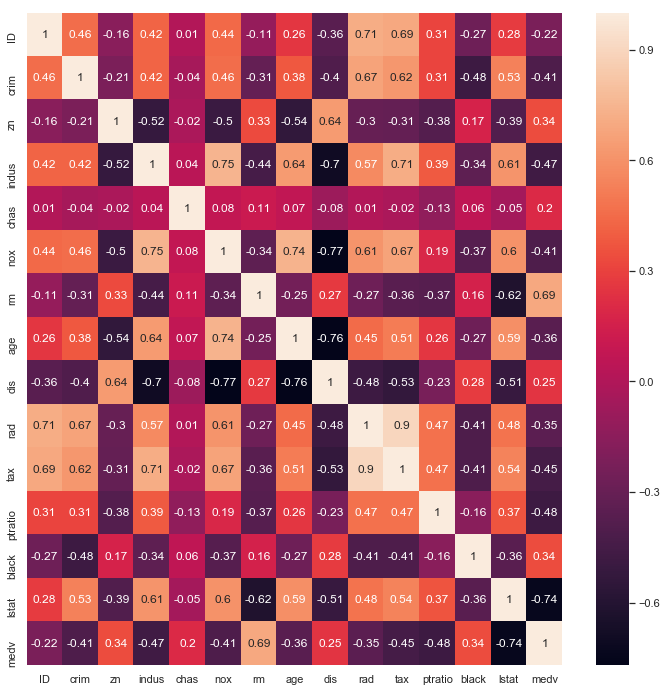

<Figure size 432x432 with 0 Axes>

In [10]:
correlation_matrix = data.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.figure(figsize=(6,6))
plt.show()

In [14]:
print(correlation_matrix['medv'])

ID        -0.22
crim      -0.41
zn         0.34
indus     -0.47
chas       0.20
nox       -0.41
rm         0.69
age       -0.36
dis        0.25
rad       -0.35
tax       -0.45
ptratio   -0.48
black      0.34
lstat     -0.74
medv       1.00
Name: medv, dtype: float64


In [22]:
# Построим линейную регрессию для параметров с корреляцией больше 0,5: rm, lstat
# Разделим данные на тестовые и тренировочные
from sklearn.model_selection import train_test_split

X = data[['lstat','rm']]
Y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print("Number train dataset: ", len(X_train))
print("Number test dataset: ", len(X_test))
print("Total number: ", len(X_train)+len(X_test))

Number train dataset:  266
Number test dataset:  67
Total number:  333


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 5.23513893839359
slope: [-0.6903728   4.18337022]


In [24]:
# Сравним предсказание с реальностью
Y_pred = model.predict(X_test)
Y_pred[:4]

array([25.84928334, 29.72459828, 16.28592799, 13.84096543])

In [26]:
np.array(y_test)[:4]

array([22.9, 28. , 11. , 15.4])

In [30]:
# Посчитаем квадратичную ошибку
from sklearn.metrics import mean_squared_error
print(mean_squared_error(np.array(y_test),Y_pred))

33.106795681595116


In [31]:
# Посчитаем оценку R2
from sklearn.metrics import r2_score
print(r2_score(np.array(y_test),Y_pred))

0.6234501380268247


In [32]:
# Посчитаем среднее абсолютное отклонение
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(np.array(y_test),Y_pred))

4.008887122406098
